----

# Descripción Proyecto

En este proyecto, nuestro objetivo es determinar la viabilidad de instaurar una cafetería operada por robots en Los Ángeles. Aunque la idea es innovadora y tiene un gran potencial, su implementación tiene un alto costo. Por ello, nuestra tarea principal es la de atraer a inversores. Estos están principalmente interesados en la situación actual del mercado y en si seremos capaces de mantener nuestra posición competitiva una vez que el factor de novedad de los camareros robot desaparezca.

Para afrontar este desafío, realizaremos un análisis exhaustivo del mercado basándonos en datos disponibles al público sobre el sector de la restauración en Los Ángeles.

Reiterando la importancia de un estudio de mercado riguroso y basado en datos sólidos.

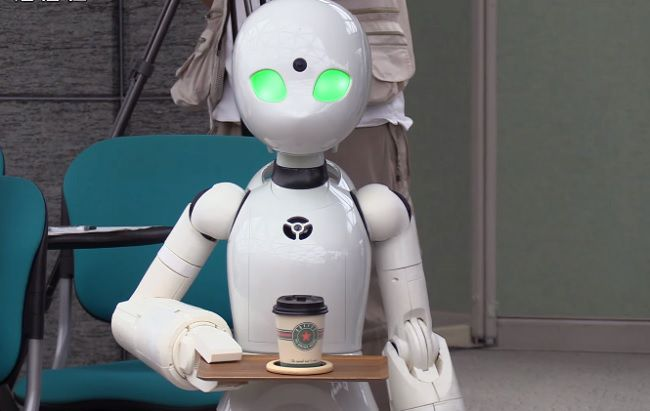

# Cargar datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import difflib

sns.set_palette(palette='tab10')

In [3]:
# cargamos el set de datos
restaurant_data = pd.read_csv('/datasets/rest_data_us.csv', dtype={'chain':'boolean','object_type':'category'})

In [4]:
# mostramos parte de los datos
restaurant_data.sample(5)

,id,object_name,address,chain,object_type,number
7895,19681,HAN SHIK,928 S WESTERN AVE #135,True,Restaurant,28
6001,17787,KRISPY KRUNCHY CHICKEN,4448 W SLAUSON AVE,True,Restaurant,24
7229,19015,THE KITCHEN @ WESTWOOD,1510 WESTWOOD BLVD,True,Restaurant,18
3505,15291,LALIBELA ETHIOPIAN RESTAURANT,1025 S FAIRFAX AVE,True,Restaurant,45
1690,13476,HAMJIPARK RESTAURANT,4135 W PICO BLVD,True,Restaurant,45


In [5]:
# obtenemos información general de los datos
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   boolean 
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: boolean(1), category(1), int64(2), object(2)
memory usage: 330.2+ KB


#### Descripción de proyecto

* Object_name = nombre del establecimiento

* Chain = establecimiento que pertenece a una cadena (True/False)

* Object_type = tipo de establecimiento

* Address = dirección

* Number = número de asientos


Podemos notar que los nombres de las columnas y los tipos de datos están bien definidos. Además, tenemos tres valores nulos en la columna 'chain'.

# Procesamiento de datos

In [6]:
# nos aseguramos que el contendido del dataframe este en mayúsculas para homogeneizar el contenido
restaurant_data['object_name']=restaurant_data['object_name'].str.upper()
restaurant_data['address']=restaurant_data['address'].str.upper()
restaurant_data['object_type']=restaurant_data['object_type'].str.upper()

## Valores nulos y duplicados

In [7]:
# revisamos el set de datos buscando valores nulos
restaurant_data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [8]:
# obtenemos los nombres de los establecimientos donde la columna 'chain' tiene un valor ausente
lista_establecimiento=restaurant_data[restaurant_data['chain'].isna()]['object_name']
lista_establecimiento

7408    TAQUERIA LOS 3 CARNALES
7523       JAMMIN JIMMY'S PIZZA
8648      THE LEXINGTON THEATER
Name: object_name, dtype: object

In [9]:
# creamos el dataframe con los nombres de establecimientos en la lista creada anteriormente
restaurant_data[restaurant_data['object_name'].isin(lista_establecimiento)]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,<NA>,RESTAURANT,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,<NA>,PIZZA,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,<NA>,RESTAURANT,35


Busquemos los nombres de establecimientos que parecidos para decidir si pertenecen o no a una cadena.

In [10]:
# buscamos 'CARNALES', 'LEXINGTON' y 'JAMMIN' en el set de datos
restaurant_data[(restaurant_data['object_name'].str.contains('CARNALES'))\
                | (restaurant_data['object_name'].str.contains('LEXINGTON'))\
                | (restaurant_data['object_name'].str.contains('JAMMIN'))]

,id,object_name,address,chain,object_type,number
6419,18205,TACOS LOS CARNALES,4370 S CENTRAL AVE,False,FAST FOOD,47
6624,18410,TACOS LOS 3 CARNALES,5000 WHITTIER BLVD,False,FAST FOOD,6
6790,18576,WI JAMMIN CAFE,1359 S REDONDO BLVD,False,RESTAURANT,28
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,<NA>,RESTAURANT,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,<NA>,PIZZA,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,<NA>,RESTAURANT,35
9616,21402,TACOS LOS 4 CARNALES,5000 WHITTIER BLVD,False,FAST FOOD,9


Podemos notar que a pesar que el nombre tiene similitudes con otros, no parecen pertenecer a ninguna cadena o ser el mismo establecimiento puesto que tienen otras características distintos entre ellos. Procederemos a sustituir el valor ausente en la columna 'chain' por 'False'.

In [11]:
# rellenamos los valores ausentes en la columna 'chain' con 'False'
restaurant_data['chain'].fillna(False,inplace=True)

In [12]:
# verificamos que se haya hecho el reemplazo
restaurant_data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

Vamos a reemplazar los valores 'False' y 'True'en la columna 'chain', lo haremos para poder hacer un mejor manejo en los gráficos.

In [13]:
# reemplazamos los valores booleanos en la columna 'chain'
restaurant_data['chain'].replace({False:'No pertenece',True:'Pertenece'},inplace=True)

In [14]:
# revisamos en busca de datos duplicados
restaurant_data.duplicated().sum()

0

No tenemos datos duplicados ni valores ausentes, así que vamos a continuar con el preprocesamiento de los datos.

## Nombre de restaurantes

In [15]:
def extraer_pre_name_chain(object_name):
   
    ### object_name=nombre del establecimiento ###
  
    # Definimos un diccionario para los reemplazos
    reemplazos = {
        r'#\d+|#\s\d+|#\w+\d+\-\d+': '',  # eliminamos los digitos y los numerales al inicio y final del texto
        r'COMPANY': 'CO.',  # reemplazamos 'CO.' por 'COMPANY'
        r'INCORPORATION': 'INC.'  # reemplazamos 'INCORPORATION' por 'INC.'
    }

    # Aplicamos los reemplazos en el nombre del establecimiento
    for pat, repl in reemplazos.items():
        object_name = re.sub(pat, repl, object_name)

    return object_name.strip()  # eliminamos los espacios adicionales al inicio y al final


In [16]:
# aplicamos la funcion para extraer el 'pre_name_chain' de los establecimientos
restaurant_data['pre_name_chain']=restaurant_data['object_name'].apply(extraer_pre_name_chain)

In [17]:
# mostramos parte de los datos
restaurant_data.sample(5)

,id,object_name,address,chain,object_type,number,pre_name_chain
279,12065,VANESSA'S BAKERY,2747 BEVERLY BLVD,Pertenece,BAKERY,22,VANESSA'S BAKERY
3583,15369,DRINK / QUENCH HOLLYWOOD,6848 W SUNSET BLVD,Pertenece,RESTAURANT,19,DRINK / QUENCH HOLLYWOOD
1492,13278,YUPDDUK,3132 W OLYMPIC BLVD,No pertenece,RESTAURANT,16,YUPDDUK
3221,15007,MERKATO,1036 1/2 S FAIRFAX AVE,No pertenece,RESTAURANT,44,MERKATO
8431,20217,OI ASIAN FUSION,4734 HOLLYWOOD BLVD,No pertenece,RESTAURANT,5,OI ASIAN FUSION


In [18]:
# consideremos la siguiente agrupacion para 'STARBUCKS'
restaurant_data[restaurant_data['object_name'].str.contains("STARBUCKS")][['chain','pre_name_chain']].value_counts()

chain      pre_name_chain                       
Pertenece  STARBUCKS COFFEE                         87
           STARBUCKS                                30
           STARBUCKS EVENING                         2
           STARBUCKS  @ USC                          1
           STARBUCKS (COFFEE BAR) LEVEL 1 - UCLA     1
           STARBUCKS -  DEPARTURE                    1
           STARBUCKS - ARRIVAL                       1
           STARBUCKS 22477                           1
           STARBUCKS CAFE 84                         1
           STARBUCKS COFFEE CORPORATION              1
           STARBUCKS STORE                           1
           STARBUCKS-17413                           1
           STARBUCKS/LA CAFE                         1
dtype: int64

In [19]:
# encontremos la similitud entre las palabras usando la libreria 'difflib'
difflib.get_close_matches('STARBUCKS 22477', ['STARBUCKS COFFEE', 'STARBUCKS',"ANDY'S BAKERY"],cutoff=0.7)

['STARBUCKS']

In [20]:
# encontremos la similitud entre las palabras usando la libreria 'difflib'
difflib.get_close_matches('STARBUCKS CAFE 84', ['STARBUCKS COFFEE', 'STARBUCKS',"ANDY'S BAKERY",'TACO BELL'],cutoff=0.5)

['STARBUCKS COFFEE', 'STARBUCKS']

In [21]:
# consideremos la siguiente agrupacion de establecimientos que pertenecen a una cadena
restaurant_data[restaurant_data['chain']=='Pertenece']['pre_name_chain'].value_counts()

SUBWAY                        113
STARBUCKS COFFEE               87
MCDONALD'S                     79
JACK IN THE BOX                52
THE COFFEE BEAN & TEA LEAF     51
                             ... 
CAPITAL ONE CAFE                1
COREA BBQ DSISHWASHER ROOM      1
KIKKA @ LMU                     1
LOS BURRITOS RESTAURANT         1
CAFE 606 DELI                   1
Name: pre_name_chain, Length: 2102, dtype: int64

In [22]:
# contamos las veces que se repite el nombre de un establecimiento y mostramos percentiles para este conteo
data=restaurant_data['pre_name_chain'].value_counts()
np.percentile(data,[50,90,95,97,99,99.5])

array([1., 1., 2., 2., 4., 8.])

In [23]:
# creamos una lista con los nombres de establecimiento que se repiten 8 ó mas veces
lista_name=[data.index[i] for i in range(len(data)) if data[i]>=8]

In [25]:
##Creamos una columna con el nombre de los establecimientos definitivos, aquellos que pertenecen a una cadena
def extraer_name_chain(pre_name_chain):
    
    ##pre_name_chain= la columna que contiene los valores a usar para crear la columna de name_chain definitiva
    
    
    # comparamos cada valor de la columna 'pre_name_chain' con los valores de la lista 'lista_name' y encontrar similitudes
    try:
        name=difflib.get_close_matches(pre_name_chain, lista_name,cutoff=0.8)[0]
        return name
    except:
        return pre_name_chain

In [26]:
# aplicamos la funcion para crear el 'name_chain' de los establecimientos
restaurant_data['name_chain']=restaurant_data['pre_name_chain'].apply(extraer_name_chain)

In [27]:
# eliminamos la columna 'pre_name_chain'
restaurant_data.drop('pre_name_chain',inplace=True,axis=1)

In [28]:
# mostramos parte de los datos
restaurant_data[restaurant_data['name_chain'].str.contains('STARBUCKS')].sample(5)

,id,object_name,address,chain,object_type,number,name_chain
6002,17788,STARBUCKS #24851,2720 N GRIFFITH PARK BLVD,Pertenece,CAFE,43,STARBUCKS
7623,19409,STARBUCKS COFFEE #536,1161 WESTWOOD BLVD,Pertenece,CAFE,19,STARBUCKS COFFEE
6628,18414,STARBUCKS #22640,12404 VENICE BLVD STE A,Pertenece,CAFE,3,STARBUCKS
5846,17632,STARBUCKS STORE #11233,523 W 6TH ST,Pertenece,CAFE,26,STARBUCKS STORE
9057,20843,STARBUCKS COFFEE #9973,120 S LOS ANGELES ST,Pertenece,CAFE,12,STARBUCKS COFFEE


# Separar nombres de calles de la dirección

Para hacer esta separación usaremos el método 're.compile' que nos ayuda a separar un texto. De la biblioteca 'usaddress' vamos a utilizar los datos de los tipos de direcciones ('Norte', 'Sur, etc) y abreviaciones de los tipos de calles ('St','Street', etc), 'DIRECTIONS' y 'STREET_NAMES', respectivamente.

In [29]:
# Lista de nombres a eliminar
nombres_a_eliminar = ['STE', 'PK', 'HILL', 'WAY', 'GROVE', 'PARK', 'SPRING', 'GATEWAY', 'VALLEY', 'UNION', 'CENTER', 'FOREST', 'WALL', 'MISSION', 'FORD', 'AVENUE', 'PLAZA', 'VILLAGE', 'TERRACE']

# Iterar sobre los nombres a eliminar y reemplazarlos en la columna 'address'
for nombre in nombres_a_eliminar:
    restaurant_data['address'] = restaurant_data['address'].str.replace(nombre, '')

# Mostrar solo la columna 'address'
print(restaurant_data['address'].sample(10))



7103         2700 COLORADO BLVD
2558    404 S FIGUEROA ST # 108
2114    1250 S VERMONT AVE  106
5046        1019 S SANTA FE AVE
9592       7851 S CRENSHAW BLVD
5641              2320 E 4TH ST
6960         1638 CAHUENGA BLVD
4737         900 W OLYMPIC BLVD
1332        465 LA CIENEGA BLVD
4281        11300 NATIONAL BLVD
Name: address, dtype: object


In [30]:
###Creamos la función para extraer el nombre de la calle a partir de una dirección en USA, usando re.compile
def extraer_pre_calle(address):
    
    ##address=la direccion en USA
    
    domicilio = address
    
    # direcciones
    direcciones=['E','W','S','N','SE','SW','NE','NW']
    
    # eliminemos los digitos y los numerales al inicio y final del texto
    nuevo_texto = re.sub(r'^\d+|\s\d+\s|\s#.*|\s\w\d+','', domicilio)
    
    # quitamos abreviaturas de direcciones
    pattern1 = '|'.join(map(re.escape, direcciones))+" "
    p=re.compile(r'\b(?:{})\b'.format(pattern1))
    sin_direcciones=p.sub('',nuevo_texto).strip()
    
    # quitamos abreviaturas de calles
    pattern2 = '|'.join(map(re.escape, nombres_a_eliminar))
    
    p=re.compile(r'\b(?:{})\b'.format(pattern2))
    sin_tipo_calle=p.sub('',sin_direcciones)
    
    # quitamos algun digito que haya quedado
    resultado = re.sub(r'\s\d+$', '', sin_tipo_calle).strip()
    
    return resultado

In [31]:
# aplicamos la funcion para extraer el nombre de la pre_calle
restaurant_data['pre_calle']=restaurant_data['address'].apply(extraer_pre_calle)

In [32]:
# mostramos parte de los datos
restaurant_data.sample(5)

,id,object_name,address,chain,object_type,number,name_chain,pre_calle
145,11931,BORDER GRILL,380 WORLD T38,No pertenece,RESTAURANT,73,BORDER GRILL,WORLD
8928,20714,THE COMEDY UNION,5040 W PICO BLVD,No pertenece,RESTAURANT,23,THE COMEDY UNION,PICO BLVD
7606,19392,PAVILION WEST BAR-3RD FL,135 N GRAND AVE 3RD,No pertenece,BAR,101,PAVILION WEST BAR-3RD FL,GRAND AVE 3RD
542,12328,MAGIC FINGERS EAT EM UP,1116 E EL SEGUNDO BLVD,No pertenece,RESTAURANT,15,MAGIC FINGERS EAT EM UP,EL SEGUNDO BLVD
5486,17272,THE KITCHEN AT CONSTELLATION,10250 CONLLATION BLVD #175,Pertenece,RESTAURANT,36,THE KITCHEN AT CONSTELLATION,CONLLATION BLVD


In [33]:
# contamos las veces que se repite una calle y mostramos percentiles para este conteo
data=restaurant_data['pre_calle'].value_counts()
np.percentile(data,[50,90,95,97,99])

array([  1.  ,  17.  ,  51.3 ,  81.58, 243.41])

In [34]:
# creamos una lista con las calles que se repiten 22 ó mas veces
lista_calles=[data.index[i] for i in range(len(data)) if data[i]>=22]

In [35]:
##Creamos una columna con el nombre de las calles definitivas
def extraer_calle(pre_calle):
    
    ##pre_calle= la columna que contiene los valores a usar para crear la columna de calle definitiva
   
    
    # comparamos los valores en la lista 'lista_calles' con los valores en la columna 'pre_calle'
    for elem in lista_calles:
        if elem in pre_calle:
            return elem
        else:
            return pre_calle

In [36]:
# aplicamos la funcion para extraer el nombre de la calle
restaurant_data['calle']=restaurant_data['pre_calle'].apply(extraer_calle)

In [37]:
# eliminamos la columna 'pre_calle'
restaurant_data.drop('pre_calle',inplace=True,axis=1)

In [38]:
# mostramos parte de los datos
restaurant_data.sample(5)

,id,object_name,address,chain,object_type,number,name_chain,calle
9253,21039,THE CINEFAMILY,611 N FAIRFAX AVE,No pertenece,RESTAURANT,26,THE CINEFAMILY,FAIRFAX AVE
4318,16104,MENDOCINO FARMS,735 S FIGUEROA ST #129,Pertenece,RESTAURANT,41,MENDOCINO FARMS,FIGUEROA ST
7672,19458,CHINA TOWN EXPRESS #1,4201 W BEVERLY BLVD,Pertenece,FAST FOOD,5,CHINATOWN EXPRESS,BEVERLY BLVD
2334,14120,LUCIFER'S PIZZA,6104 W SUNSET BLVD,Pertenece,PIZZA,49,LUCIFER'S PIZZA,SUNSET BLVD
3682,15468,LOS ANGELES CITY COLLEGE STUDENT UNION KITCHEN 1F,855 N VERMONT AVE,No pertenece,RESTAURANT,192,LOS ANGELES CITY COLLEGE STUDENT UNION KITCHEN 1F,VERMONT AVE


# Análisis datos

En esta sección vamos a realizar el análisis de los datos y a crear los gráficos necesarios.

Para estudiar las proporciones de los distintos tipos de establecimientos vamos a agrupar el set de datos por la columna 'object_type'.

In [39]:
# obtenemos las proporciones para cada tipo de establecimiento
proporcion_object_type=restaurant_data['object_type'].value_counts(normalize=True)\
                            .reset_index()
proporcion_object_type.columns=['category','proportion']
proporcion_object_type

,category,proportion
0,RESTAURANT,0.751736
1,FAST FOOD,0.110455
2,CAFE,0.045073
3,PIZZA,0.033157
4,BAR,0.030256
5,BAKERY,0.029323


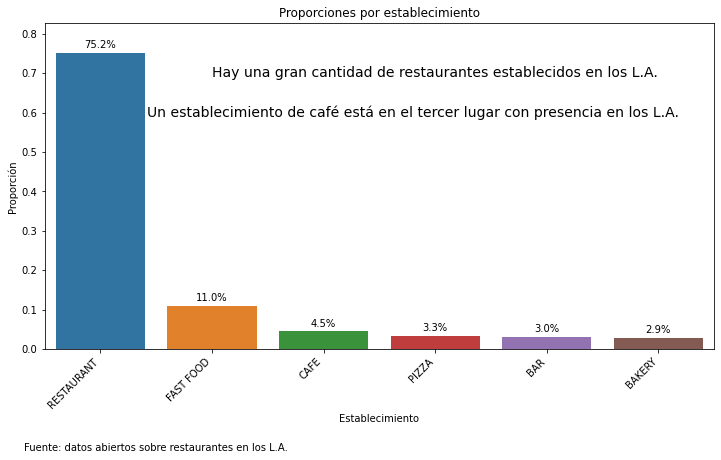

In [40]:
# Trazamos un gráfico de las proporciones de los tipos de establecimiento
f,ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(data=proporcion_object_type,x='category',y='proportion',\
            order=proporcion_object_type.sort_values('proportion',ascending = False).category)

# add text
ax.text(3,0.7,"Hay una gran cantidad de restaurantes establecidos en los L.A.",\
            fontsize = 14,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(2.8,0.6,"Un establecimiento de café está en el tercer lugar con presencia en los L.A.",\
            fontsize = 14,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(0.5,-0.25,"Fuente: datos abiertos sobre restaurantes en los L.A.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 3
    # Vertical alignment 'va'

    # Use Y value as label and format number with zero decimal place
    label = "{:.1%}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va='bottom')     
plt.ylim(0,proporcion_object_type['proportion'].max()*1.1)
plt.title('Proporciones por establecimiento')
plt.ylabel('Proporción')
plt.xlabel('Establecimiento')
plt.xticks(rotation=45,ha='right')
plt.show()

## Proporciones de los distintos tipos de establecimientos pertenecientes a una cadena

Para estudiar las proporciones de los distintos tipos de establecimientos pertenecientes a una cadena vamos a agrupar el set de datos por las columnas 'object_type' y 'chain'.

In [41]:
# obtenemos las proporciones para cada tipo de establecimiento por cada cadena
proporcion_chain_type=restaurant_data[['object_type','chain']].value_counts(normalize=True)\
                            .reset_index()
proporcion_chain_type.columns=['category','chain','proportion']
proporcion_chain_type

,category,chain,proportion
0,RESTAURANT,No pertenece,0.514247
1,RESTAURANT,Pertenece,0.237488
2,FAST FOOD,Pertenece,0.062688
3,FAST FOOD,No pertenece,0.047767
4,BAKERY,Pertenece,0.029323
5,CAFE,Pertenece,0.027562
6,BAR,No pertenece,0.022277
7,CAFE,No pertenece,0.017511
8,PIZZA,No pertenece,0.017304
9,PIZZA,Pertenece,0.015853


In [42]:
# obtenemos las proporciones de pertenencia a una cadena para el tipo de establecimiento 'Restaurant'
proporcion=restaurant_data.query("object_type=='RESTAURANT'")[['object_type','chain']].value_counts(normalize=True)
proporcion.map('{:.1%}'.format)

object_type  chain       
RESTAURANT   No pertenece    68.4%
             Pertenece       31.6%
dtype: object

In [43]:
# obtenemos las proporciones de pertenencia a una cadena para el tipo de establecimiento 'Cafe'
proporcion=restaurant_data.query("object_type=='CAFE'")[['object_type','chain']].value_counts(normalize=True)
proporcion.map('{:.1%}'.format)

object_type  chain       
CAFE         Pertenece       61.1%
             No pertenece    38.9%
dtype: object

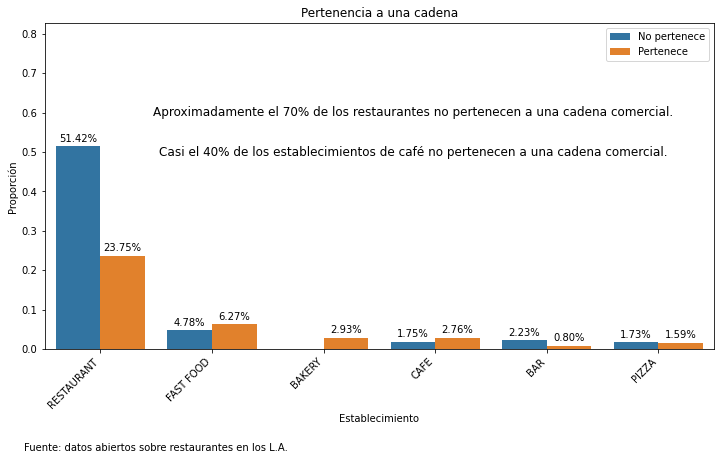

In [44]:
# Trazamos un gráfico de las proporciones de los tipos de establecimiento y su pertenencia a una cadena
f,ax=plt.subplots(figsize=(12,6))

#ordenamiento
ordered=proporcion_chain_type[['category','proportion']].groupby('category').max().reset_index()

ax=sns.barplot(data=proporcion_chain_type,x='category',y='proportion',hue='chain',\
            order=ordered.sort_values('proportion',ascending = False).category)

# add text
ax.text(2.8,0.6,"Aproximadamente el 70% de los restaurantes no pertenecen a una cadena comercial.",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(2.8,0.5,"Casi el 40% de los establecimientos de café no pertenecen a una cadena comercial.",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(0.5,-0.25,"Fuente: datos abiertos sobre restaurantes en los L.A.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 3
    # Vertical alignment 'va'

    # Use Y value as label and format number with zero decimal place
    label = "{:.2%}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va='bottom')     
plt.ylim(0,proporcion_object_type['proportion'].max()*1.1)
plt.title('Pertenencia a una cadena')
plt.ylabel('Proporción')
plt.xlabel('Establecimiento')
plt.xticks(rotation=45,ha='right')
plt.legend(loc='best')
plt.show()

Del gráfico anterior, podemos notar que los tipos de establecimientos que mayoritariamente pertenecen a una cadena son: Fast Food, Cafe y Bakery.

### ¿Qué caracteriza a las cadenas comerciales?

In [45]:
# veamos como se distribuye el número de asientos para los establecimientos que pertenecen a una cadena
restaurant_data.query("chain=='Pertenece'")['number'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

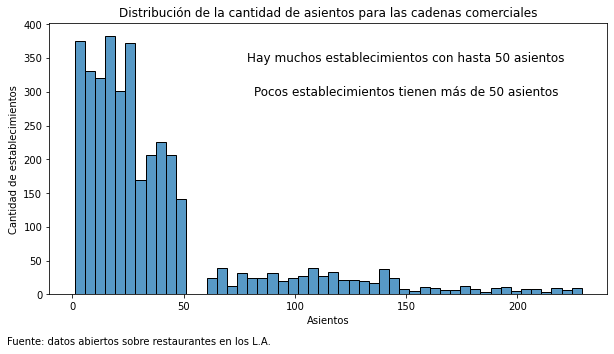

In [46]:
# tracemos un histograma para ver su distribución
f,ax=plt.subplots(figsize=(10,5))
ax=sns.histplot(restaurant_data.query("chain=='Pertenece'")['number'],bins=50)

# add text
ax.text(150,350,"Hay muchos establecimientos con hasta 50 asientos",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(150,300,"Pocos establecimientos tienen más de 50 asientos",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(30,-70,"Fuente: datos abiertos sobre restaurantes en los L.A.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
plt.title('Distribución de la cantidad de asientos para las cadenas comerciales')
plt.xlabel('Asientos')
plt.ylabel('Cantidad de establecimientos')
plt.show()

### Promedio de asientos para cada tipo de establecimiento

In [47]:
# calculamos el promedio de asientos para cada tipo de establecimiento
mean_number=restaurant_data.pivot_table(index=['object_type','chain'],values='number',aggfunc='mean').reset_index()
mean_number

,object_type,chain,number
0,BAKERY,Pertenece,21.773852
1,BAR,No pertenece,46.381395
2,BAR,Pertenece,40.259740
3,CAFE,No pertenece,23.556213
4,CAFE,Pertenece,25.917293
5,FAST FOOD,No pertenece,23.633406
6,FAST FOOD,Pertenece,38.089256
7,PIZZA,No pertenece,31.143713
8,PIZZA,Pertenece,25.529412
9,RESTAURANT,No pertenece,49.513802


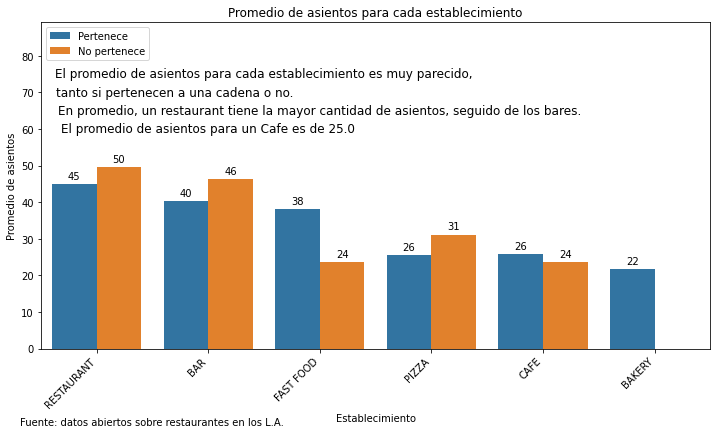

In [48]:
# Trazamos un gráfico del promedio de asientos para cada tipo de establecimiento
f,ax=plt.subplots(figsize=(12,6))

#ordenamiento
ordered=mean_number[['object_type','number']].groupby('object_type').max().reset_index()

ax=sns.barplot(data=mean_number,x='object_type',y='number',hue='chain',\
              order=ordered.sort_values('number',ascending = False).object_type)

media_cafe=mean_number[mean_number['object_type']=='CAFE']['number'].mean().round(0)

# add text
ax.text(1.5,75,"El promedio de asientos para cada establecimiento es muy parecido,",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(0.7,70,"tanto si pertenecen a una cadena o no.",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(2,65,"En promedio, un restaurant tiene la mayor cantidad de asientos, seguido de los bares.",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(1,60,"El promedio de asientos para un Cafe es de "+str(media_cafe),\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(0.5,-20,"Fuente: datos abiertos sobre restaurantes en los L.A.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 3
    # Vertical alignment 'va'

    # Use Y value as label and format number with zero decimal place
    label = "{:.0f}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va='bottom')     
plt.ylim(0,mean_number['number'].max()*1.8)
plt.title('Promedio de asientos para cada establecimiento')
plt.ylabel('Promedio de asientos')
plt.xlabel('Establecimiento')
plt.xticks(rotation=45,ha='right')
plt.legend(loc='best')
plt.show()

### Diez mejores calles por número de establecimientos

In [49]:
# agrupamos por nombre de la calle y extraemos las 10 calles con mayor numero de establecimientos
best_calles=restaurant_data.groupby('calle').agg(count_type=('object_type','count'))\
                                .sort_values(by=['count_type','calle'],ascending=False)[0:10]
best_calles

,count_type
calle,
SUNSET BLVD,404
WILSHIRE BLVD,365
PICO BLVD,359
WERN AVE,345
FIGUEROA ST,311
OLYMPIC BLVD,289
VERMONT AVE,277
SANTA MONICA BLVD,251
3RD ST,247


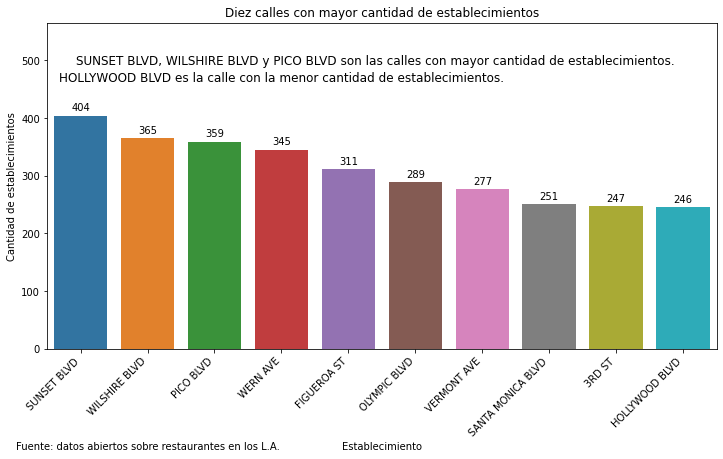

In [50]:
# Trazamos un gráfico para las diez calles con mayor numero de establecimiento
f,ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(data=best_calles,x=best_calles.index,y='count_type')

# add text
primero=str(best_calles.index[0])
segundo=str(best_calles.index[1])
tercero=str(best_calles.index[2])
ultimo=str(best_calles.index[9])
ax.text(4.4,500,primero+", "+segundo+" y "+tercero+" son las calles con mayor cantidad de establecimientos.",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(3,470,ultimo+" es la calle con la menor cantidad de establecimientos.",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(1,-170,"Fuente: datos abiertos sobre restaurantes en los L.A.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 3
    # Vertical alignment 'va'

    # Use Y value as label and format number with zero decimal place
    label = "{:.0f}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va='bottom')     
plt.ylim(0,best_calles['count_type'].max()*1.4)
plt.title('Diez calles con mayor cantidad de establecimientos')
plt.ylabel('Cantidad de establecimientos')
plt.xlabel('Establecimiento')
plt.xticks(rotation=45,ha='right')
plt.show()

### ¿Cuántas calles tienen un solo establecimiento?

In [51]:
# agrupamos por calle y contamos la cantidad de establecimientos
number_category_calle=restaurant_data.groupby('calle').agg(count_type=('object_type','count'))
number_category_calle.sample()

,count_type
calle,
6TH ST -C,1


In [52]:
# contamos las calles con un solo establecimiento
number_category_calle[number_category_calle['count_type']==1].shape

(551, 1)

### Distribución del número de asientos para las calles con muchos establecimientos

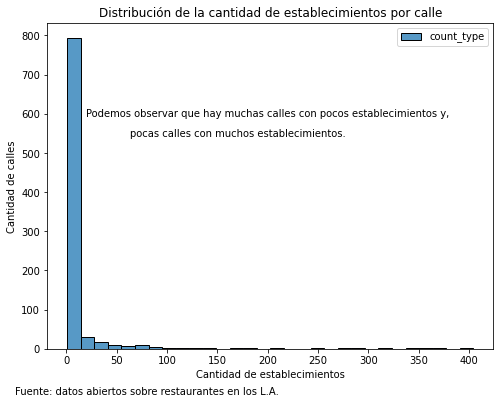

In [53]:
# creamos un histograma para observar la distribución del número de establecimientos por calle
plt.subplots(figsize=(8,6))
ax=sns.histplot(data=number_category_calle,bins=30)

# add text
ax.text(200,600,"Podemos observar que hay muchas calles con pocos establecimientos y,",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(170,550,"pocas calles con muchos establecimientos.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(80,-110,"Fuente: datos abiertos sobre restaurantes en los L.A.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
plt.xlabel('Cantidad de establecimientos')
plt.ylabel('Cantidad de calles')
plt.title('Distribución de la cantidad de establecimientos por calle')
plt.show()

Podemos observar que hay muchas calles con pocos establecimientos y pocas calles con muchos establecimientos.

In [54]:
# obtenemos los percentiles para la cantidad de establecimientos por calle
np.percentile(number_category_calle,[75,90,95,99,100]).round(0)

array([  3.,  17.,  53., 246., 404.])

Podemos notar que el 75% de las calles tiene máximo tres establecimientos, el 90% máximo veintidos establecimientos y el 95% máximo cincuenta y siete establecimientos. Hagamos que si una calle tiene más de 22 establecimientos estas calles sean consideradas con muchos establecimientos. Veamos entonces la distribución de los asientos en los establecimientos cuyas calles tienen más de 22 establecimientos.

In [55]:
# obtengamos la lista de calles que tienen más de 22 establecimientos
list_calle=number_category_calle.query('count_type>22').index

In [56]:
# usando la lista de calles 'list_calle' vamos a filtrar 'restaurant_data' para obtener los datos de los establecimientos
calle_plus22_object_type=restaurant_data[restaurant_data['calle'].isin(list_calle)]

Usando el dataframe 'calle_plus22_object_type' que contiene los registros de las calles que tienen más de veintidos establecimientos vamos a trazar una gráfico de distribución de la cantidad de asientos.

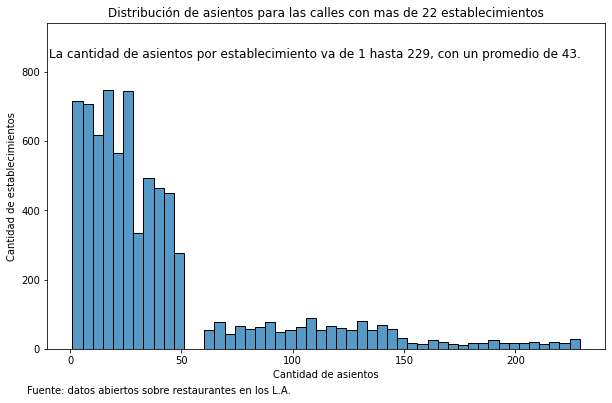

In [57]:
# creamos el gráfico de distribución de asientos para las calles con mas de 19 establecimientos
plt.subplots(figsize=(10,6))
min_number=calle_plus22_object_type['number'].min()
mean_number=calle_plus22_object_type['number'].mean().astype(int)
max_number=calle_plus22_object_type['number'].max()

ax=sns.histplot(calle_plus22_object_type['number'],bins=50)

# add text
ax.text(110,850,"La cantidad de asientos por establecimiento va de "+\
        str(min_number)+" hasta "+str(max_number)+", con un promedio de "+str(mean_number)+".",\
            fontsize = 12,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")
ax.text(40,-120,"Fuente: datos abiertos sobre restaurantes en los L.A.",\
            fontsize = 10,          # Tamaño
            fontstyle = "normal",  # Estilo
            color = "black",ha="center",va="center")

ylimit=ax.get_ylim()[1]*1.2
plt.ylim(0,ylimit)
plt.xlabel('Cantidad de asientos')
plt.ylabel('Cantidad de establecimientos')
plt.title('Distribución de asientos para las calles con mas de 22 establecimientos')
plt.show()

In [58]:
# obtenemos los percentiles para la cantidad de asientos por establecimiento para calles con más de 22 establecimientos
np.percentile(calle_plus22_object_type['number'],[50,75,90,95,99,100]).round(0)

array([ 27.,  46., 117., 145., 213., 229.])

En las calles con más de veintidos establecimientos, el 50% de los establecimientos tienen hasta 27 asientos, el 75% hasta 46 y solo el 10% de los establecimientos tiene más de 117 asientos, hasta un máximo de 229.